# Predictive Modeling Discussions

* **a. Are you working on a REGRESSION or CLASSIFICATION problem?** 

    The given problem can be approached as both REGRESSION OR CLASSIFICATION problem. I have decided to approach this as a **classification** problem by categorizing tracks with popularity < 50  as 0 (Unpopular) and songs with popularity > 50 as 1 (Popular) in a new columns called as `track_popularity_bin`. The goal is to come up with a classification model that would classify a track based on the characteristics as 0 or 1

* **b. Which variables are inputs?**

    Following variables are the final input variables I have identifed after EDA

    1. danceability 
    2. energy
    3. key
    4. loudness 
    5. mode
    6. echiness
    7. acousticness 
    8. instrumentalness
    9. liveness
    10. valence 
    11. tempo
    12. duration_ms

* **c. Which variables are responses/outputs/outcomes/targets?**

    * `track_popularity_bin` is the target variable
    
* **d. Did you need to DERIVE the responses of interest by SUMMARIZING the available data?**
    
    * Yes

* **e. If so, what summary actions did you perform?**

    * Grouped the songs with `track_popularity` < 50 as 0 and track_popularity > 50 as 1 in a new column called as `track_popularity_bin`

* **f. Which variables are identifiers and should NOT be used in the models?**

    1. track_id
    2. track_album_id
    3. playlist_id
    4. track_name
    5. playlist_name
    6. track_artist
    
*   **g. Important: Answer this question after completing parts C and D. Return to this predictive modeling discussion section to answer the following:** 
    
            i. Which of the inputs do you think influence the response, based on your exploratory visualizations? Which exploratory visualization helped you identify potential input-to-output relationships? (If you are not sure which inputs seem to influence the response, it is okay to say so.)
    
        Almost all visualizations helped with identifying relationships between the inputs and the output


## Import Modules

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [415]:
sns.set_palette("colorblind")

## Loading the Dataset

The following steps loads the dataset from the given URL into a pandas dataframe named `df`

In [486]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df_main = pd.read_csv(songs_url)

# Creating a copy. Keeping the main df intact in case needed for further analysis
df = df_main.copy()

## Basic Info about the dataset

First, I find the dimensionality of the pandas dataframe using the `df.shape` method. This tells how many rows, columns are there in the dataframe. In this case it is 32833 rows and 23 columns

In [456]:
df.shape

(32833, 23)

Then, I'm exploring the datatypes, count of not-null values in every column of the dataset using the `df.info()` method

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Also, below is the description of each of the column in the dataset

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |

## Analyzing target/output variable `track_popularity`

Above histogram shows that track_popularity is mostly normally distributed but the value 0 has lot more entries that other values. We can further confirm that using the following boxplot

### Analysis

In [458]:
df.track_popularity.describe()

count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

In [480]:
df.track_id.nunique()

28356

<Axes: xlabel='track_popularity'>

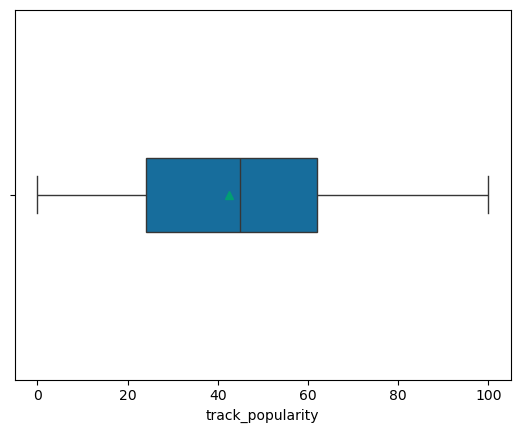

In [436]:
sns.boxplot(x=df["track_popularity"], showmeans=True, width=0.2)

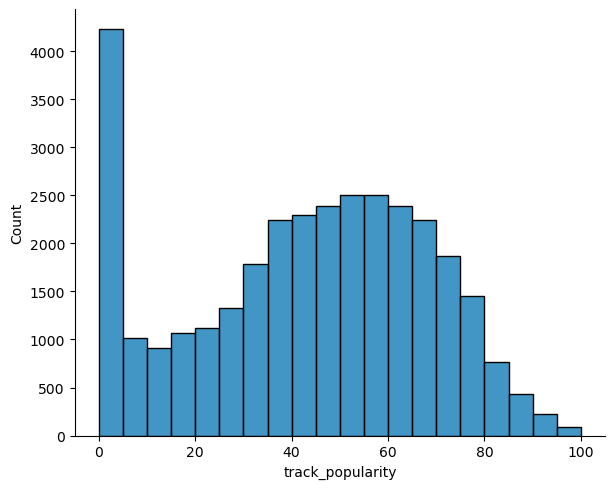

In [459]:
sns.displot(data = df, x='track_popularity', binwidth=5, aspect=1.25)

plt.show()

In [465]:
# percentage of tracks with `track_popularity` = 0
print('percentage of tracks with `track_popularity` as 0 = ', np.mean( df.track_popularity == 0 ) * 100, '%')

# percentage of tracks with `track_popularity` = 100
print('percentage of tracks with `track_popularity` as 100 = ', np.mean( df.track_popularity == 100 ) * 100, '%')

percentage of tracks with `track_popularity` as 0 =  8.23257088904456 %
percentage of tracks with `track_popularity` as 100 =  0.0060914324003289375 %


⭐ **Above plots reveal that although `track_popularity` is an integer column it is not a continous output. The values are between 0 and 100. A linear regression would work best if the output is continous. Since that is not the case this can be better approached classification problem.**

✨ To do that I will be creating a new column called as `track_popularity_bin`. Tracks with `track_popularity` > 50 will be considered as 1 (popular) and the ones <= 50 will be considered as 0 (unpopular) 

In [487]:
df['track_popularity_bin'] = np.where( df.track_popularity > 50, 1, 0 )

In [488]:
df = df.astype({'track_popularity_bin': 'object'})

In [489]:
df.track_popularity_bin.value_counts(normalize=True)

track_popularity_bin
0    0.574757
1    0.425243
Name: proportion, dtype: float64

💡 Although not perfectly balanced, the binary outcome is not overly imbalanced and so conventional classification approaches can be applied.

### Handle Duplicates

The dataframe has 32833 rows but the above analysis tells me that each row doesn't have a unique `track_id` and that is why number of unique `track_id` is 28356 and not 32833

Then, I look to see if the charactersistics of the duplicated tracks change across the entry

In [490]:
track_characteristics=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [491]:
for tc in track_characteristics:
    print(f'==={tc}===')
    print(df.groupby(['track_id']).\
    aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
              num_charc_values = (tc, 'nunique')).\
    reset_index().\
    nunique())

===danceability===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===energy===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===key===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===loudness===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===mode===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===speechiness===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===acousticness===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===instrumentalness===
track_id                28356
num_track_pop_values        1
num_charc_values            1
dtype: int64
===liveness===
track_id                28356
num

💡 The above analysis reveals that there is 1 and only 1 value for num_track_pop_values and num_valence_values. Thus, all unique tracks have a single track_popularity value and single value for the characteristics.

 📌 Based on this info, **we can remove the duplicate tracks by retaining only the first occurance of a track_id**

In [492]:
df.drop_duplicates(subset=['track_id'], keep='first', inplace=True)

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_name                28352 non-null  object 
 2   track_artist              28352 non-null  object 
 3   track_popularity          28356 non-null  int64  
 4   track_album_id            28356 non-null  object 
 5   track_album_name          28352 non-null  object 
 6   track_album_release_date  28356 non-null  object 
 7   playlist_name             28356 non-null  object 
 8   playlist_id               28356 non-null  object 
 9   playlist_genre            28356 non-null  object 
 10  playlist_subgenre         28356 non-null  object 
 11  danceability              28356 non-null  float64
 12  energy                    28356 non-null  float64
 13  key                       28356 non-null  int64  
 14  loudness   

# Exploratory Data Analysis

## Performing essential EDA using pandas methods
1. Missing Values
2. Unique Values

First, I look to see **number of missing values** for each column. This is important to know so that I can elimate columns with too many missing values as those columns won't provide much insights about the dataset

In [494]:
df.isna().sum()

track_id                    0
track_name                  4
track_artist                4
track_popularity            0
track_album_id              0
track_album_name            4
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_popularity_bin        0
dtype: int64

The above analysis shows that only three columns `track_name`, `track_artist`, `track_album_name` have missing values and that too _very minimal number of rows_ with missing value.  So far, I have not dropped any columns based on missing values.

It is now time to look at **number of unique values** for each columns. Columns with too many unique values may not be informative or may lead to overfitting, while columns with too few unique values may not provide enough discriminative power.

In [495]:
df.nunique(dropna=False)

track_id                    28356
track_name                  23450
track_artist                10693
track_popularity              101
track_album_id              22545
track_album_name            19744
track_album_release_date     4530
playlist_name                 448
playlist_id                   470
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
track_popularity_bin            2
dtype: int64

📌 Above analysis reveals that although `key` and `mode` are numeric columns those have only few unique values. So, we can treat these columns as categorical for analysis purposes

## Analyzing and Visualizing Categorical Variables

Based on the dataframe info we can determine that following columns are categorical variables

1. track_id
2. track_name
3. track_artist
4. track_album_id
5. track_album_name
6. track_album_release_date
7. playlist_name
8. playlist_id
9. playlist_genre
10. playlist_subgenre




In [497]:
df.describe(include='object')

track_id track_name track_artist  \
count                    28356      28352        28352   
unique                   28356      23449        10692   
top     6f807x0ima9a1j3VPbc7VN    Breathe        Queen   
freq                         1         18          130   

                track_album_id track_album_name track_album_release_date  \
count                    28356            28352                    28356   
unique                   22545            19743                     4530   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              135                      201   

          playlist_name             playlist_id playlist_genre  \
count             28356                   28356          28356   
unique              448                     470              6   
top     Indie Poptimism  72r6odw0Q3OWTCYMGA7Yiy            rap   
freq                294                     100           5401   

       playlist_subgenre  track_popularity_bin  
count              28356                 28356  
unique                24                     2  
top     southern hip hop                     0  
freq                1583                 17850

❌ There are far too many unique values in the columns `track_artist`, `playlist_name`, `track_album_name`, `track_name`. This makes these columns not very useful for training a model and it is not practical to show visualization for these columns. Note: Reg visualization I confirmed with the instructor on the Coursera Discussion Forum that it is not necessary to show visualization for categorical variables with far too many unique values.

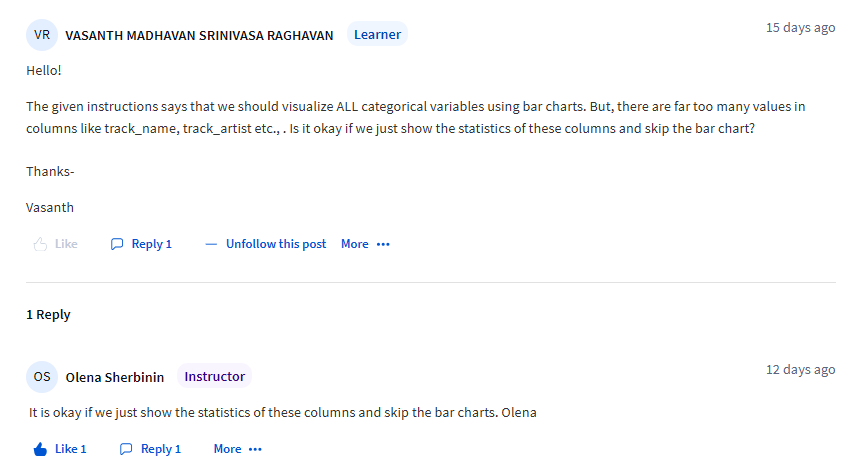

❌ Identifier columns like `track_id`, `track_album_id` and `playlist_id` will also not be very useful

In [ ]:
df.drop(['track_id','track_album_id','playlist_id','track_artist','playlist_name', 'track_name', 'track_album_name'], 
        inplace=True, 
        axis=1)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_popularity          28356 non-null  int64  
 1   track_album_release_date  28356 non-null  object 
 2   playlist_genre            28356 non-null  object 
 3   playlist_subgenre         28356 non-null  object 
 4   danceability              28356 non-null  float64
 5   energy                    28356 non-null  float64
 6   key                       28356 non-null  int64  
 7   loudness                  28356 non-null  float64
 8   mode                      28356 non-null  int64  
 9   speechiness               28356 non-null  float64
 10  acousticness              28356 non-null  float64
 11  instrumentalness          28356 non-null  float64
 12  liveness                  28356 non-null  float64
 13  valence                   28356 non-null  float64
 14  tempo      

### Create new columns

The given data presents us with the opportunity to create additional columns. These new columns may have an impact on the target variable. 

In this case, I have used  the column `track_album_release_date` to create two new columns `release_year` and `release_month`

In [507]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='mixed')

In [508]:
df['release_year'] = df.track_album_release_date.dt.year

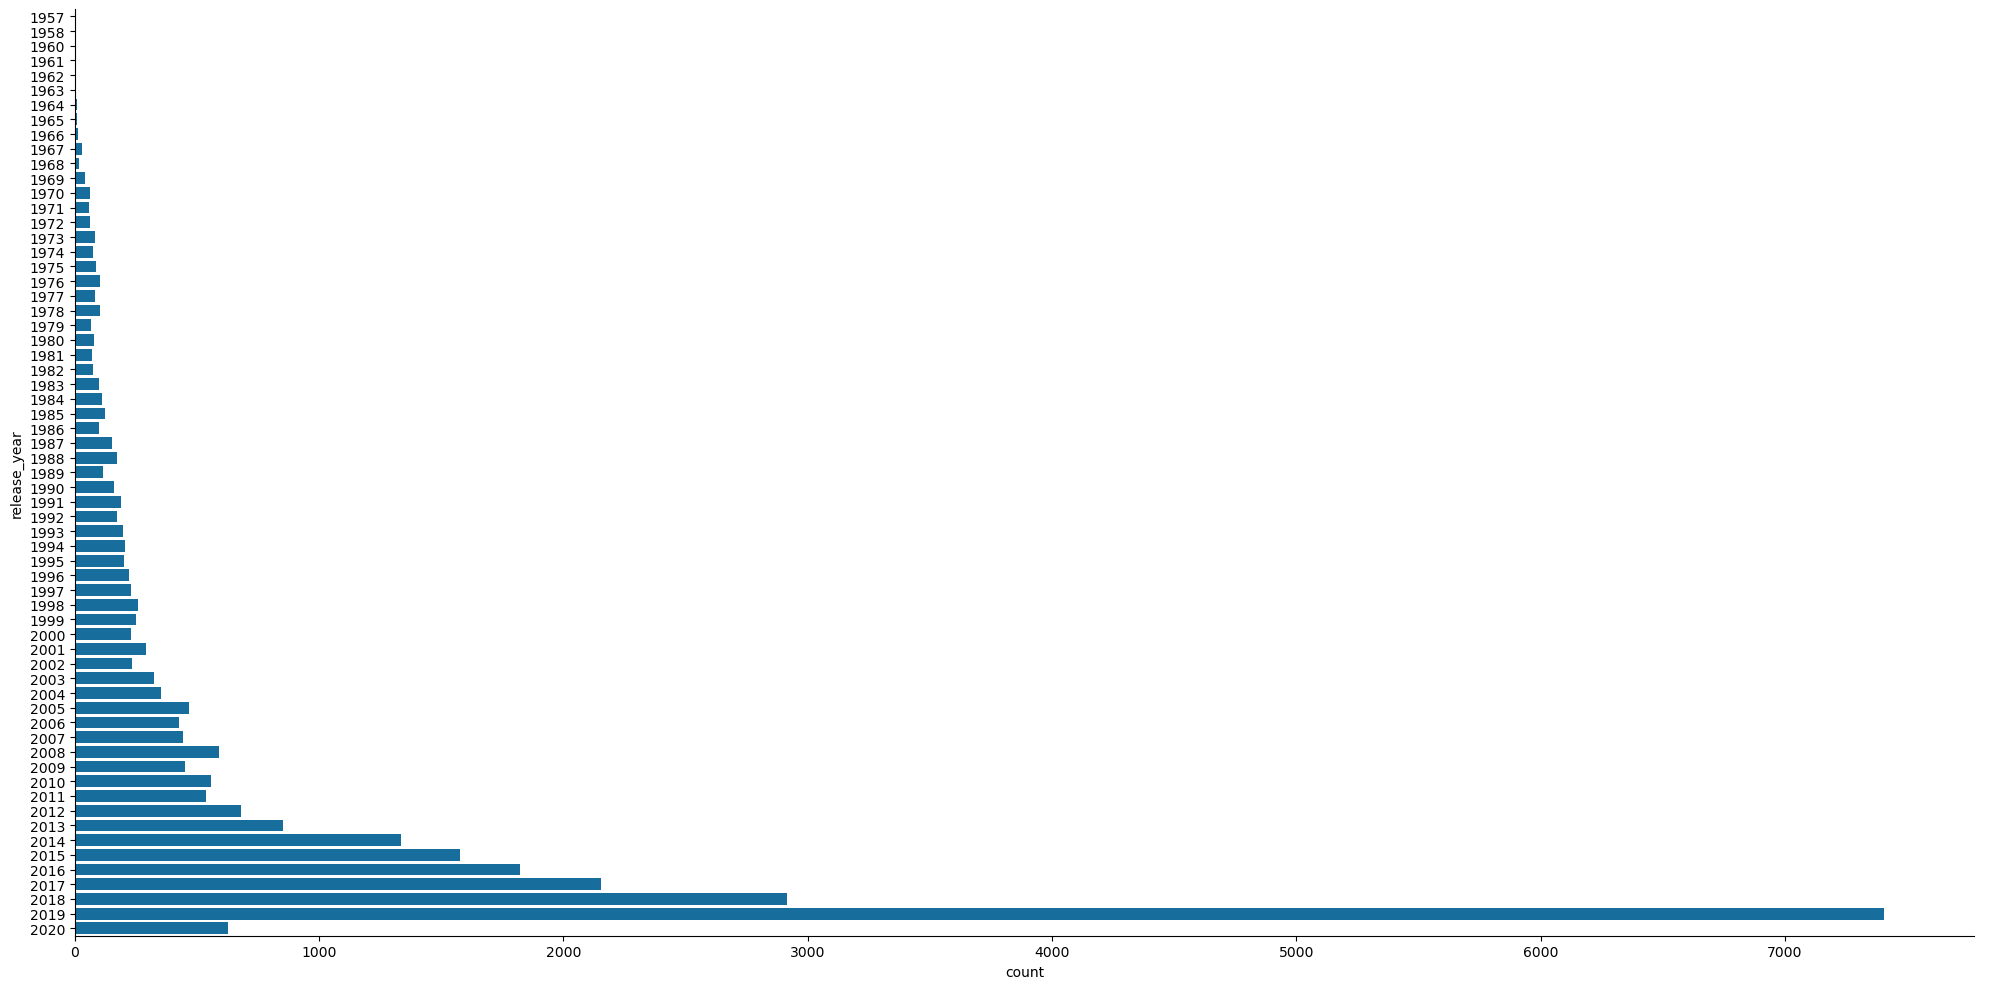

In [509]:
sns.catplot(data = df, y='release_year', kind='count', height=10, aspect=2)

plt.show()

💡 As seen above, the dataset is mostly made of songs released in the recent years rather than older years. This suggests that we can probably create one more variable that represents the release_year in two buckets. We can put songs released after 2010 in one bucket and songs released before 2010 in another

In [512]:
df['release_year_bin'] = np.where( df.release_year < 2010 , 'older', 'recent')

In [513]:
df.release_year_bin.value_counts()

release_year_bin
recent    20460
older      7896
Name: count, dtype: int64

Next, I created the `release_month` column

In [515]:
df['release_month'] = df.track_album_release_date.dt.month

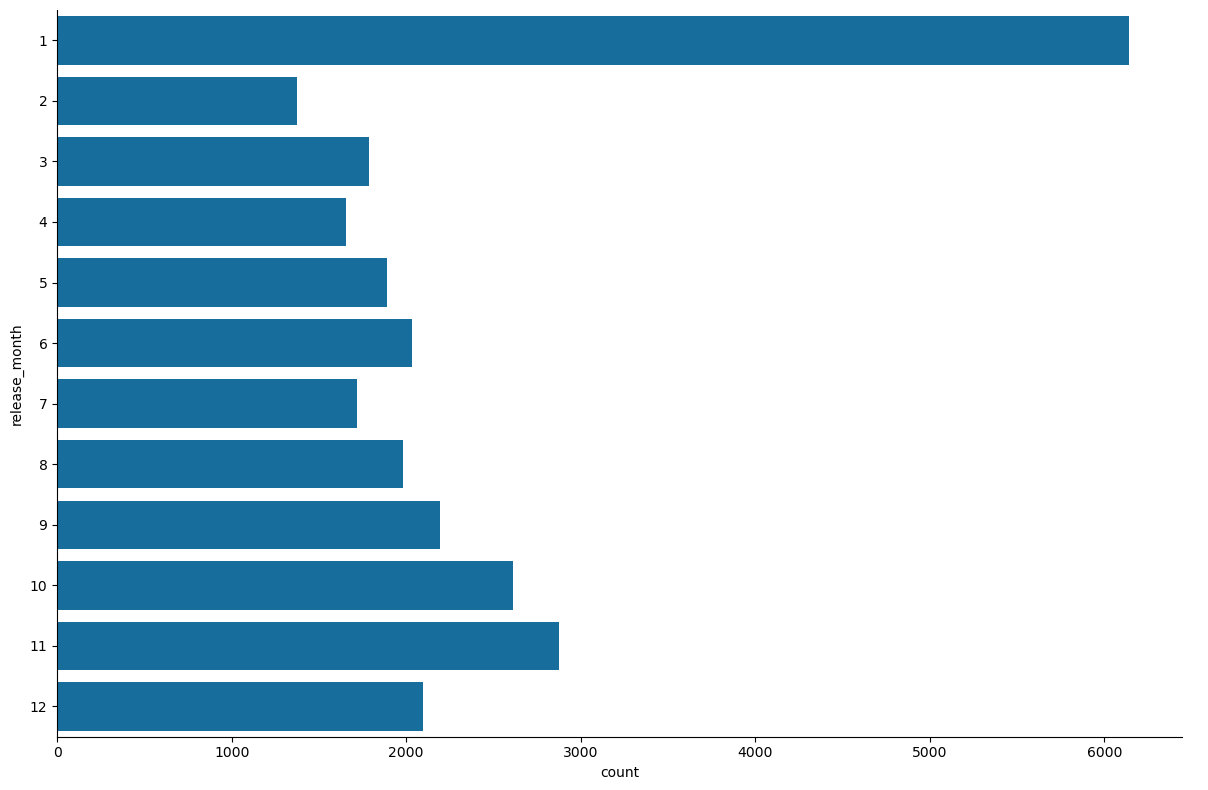

In [517]:
sns.catplot(data = df, y='release_month', kind='count', height=8, aspect=1.5)

plt.show()

💡 Majority of songs in the given dataset are release in the month of Jan

Since, `track_album_release_date` has been split into `release_year` and `release_month` the column can be dropped

In [518]:
df.drop(['track_album_release_date'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_popularity      28356 non-null  int64  
 1   playlist_genre        28356 non-null  object 
 2   playlist_subgenre     28356 non-null  object 
 3   danceability          28356 non-null  float64
 4   energy                28356 non-null  float64
 5   key                   28356 non-null  int64  
 6   loudness              28356 non-null  float64
 7   mode                  28356 non-null  int64  
 8   speechiness           28356 non-null  float64
 9   acousticness          28356 non-null  float64
 10  instrumentalness      28356 non-null  float64
 11  liveness              28356 non-null  float64
 12  valence               28356 non-null  float64
 13  tempo                 28356 non-null  float64
 14  duration_ms           28356 non-null  int64  
 15  track_popularity_bin  28

💡 Let's visualize additional variables - `key` and `mode`

Although, `key` and `mode` are numeric columns, since there are less unique values these can be considered as categorical variables



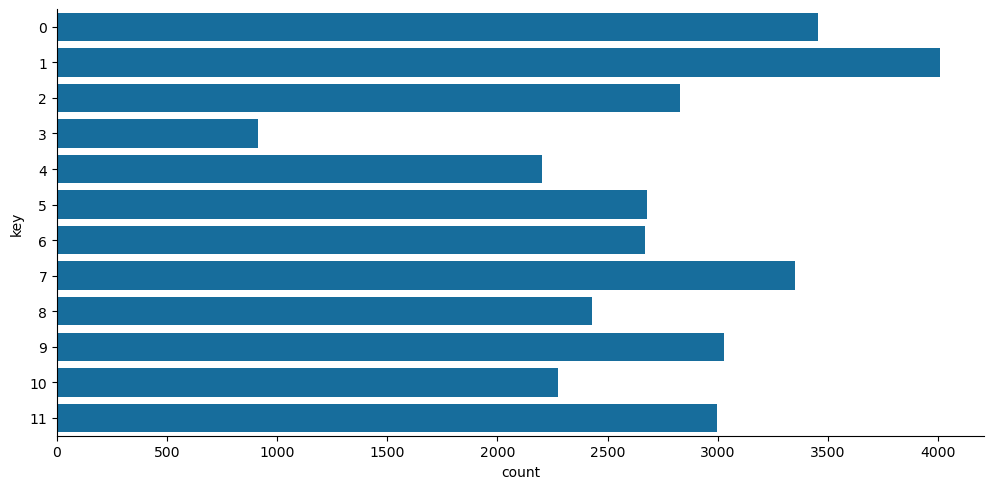

In [528]:
sns.catplot(data = df, y='key', kind='count', height=5, aspect=2)

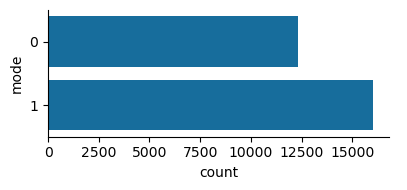

In [525]:
sns.catplot(data = df, y='mode', kind='count', height=2, aspect=2)

## Analyzing and Visualizing Continous Variables


In [529]:
df.describe()

track_popularity  danceability        energy           key  \
count      28356.000000  28356.000000  28356.000000  28356.000000   
mean          39.329771      0.653372      0.698388      5.368000   
std           23.702376      0.145785      0.183503      3.613904   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28356.000000  28356.000000  28356.000000  28356.000000   
mean      -6.817696      0.565489      0.107954      0.177176   
std        3.036243      0.495701      0.102556      0.222803   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.309250      0.000000      0.041000      0.014375   
50%       -6.261000      1.000000      0.062600      0.079700   
75%       -4.709000      1.000000      0.133000      0.260000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence        tempo  \
count      28356.000000  28356.000000  28356.000000  28356.00000   
mean           0.091117      0.190958      0.510387    120.95618   
std            0.232548      0.155894      0.234340     26.95456   
min            0.000000      0.000000      0.000000      0.00000   
25%            0.000000      0.092600      0.329000     99.97200   
50%            0.000021      0.127000      0.512000    121.99300   
75%            0.006570      0.249000      0.695000    133.99900   
max            0.994000      0.996000      0.991000    239.44000   

         duration_ms  release_year  release_month  
count   28356.000000  28356.000000   28356.000000  
mean   226575.967026   2011.054027       6.101813  
std     61078.450819     11.229221       3.841027  
min      4000.000000   1957.000000       1.000000  
25%    187742.000000   2008.000000       2.000000  
50%    216933.000000   2016.000000       6.000000  
75%    254975.250000   2019.000000      10.000000  
max    517810.000000   2020.000000      12.000000

The above table shows the basic statistics about the continous variables

For analyzing the continous variables, I start with creating a new data frame `df_lf` that will hold the data in the **LONG FORMAT**. This is done so that visualizations can be achieved easier using Seaborn

In [ ]:
df_features = df.select_dtypes('number').copy()
df_features.drop(['track_popularity'], axis=1, inplace=True) # Dropping Target variable

In [ ]:
df_objects = df.select_dtypes('object').copy()

In [357]:
id_cols = ['rowid', 'track_popularity'] + df_objects.columns.to_list()

In [537]:
df_lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_features.columns)

In [541]:
df_lf

rowid  track_popularity playlist_genre          playlist_subgenre  \
0           0                66            pop                  dance pop   
1           1                67            pop                  dance pop   
2           2                70            pop                  dance pop   
3           3                60            pop                  dance pop   
4           4                69            pop                  dance pop   
...       ...               ...            ...                        ...   
396979  32828                42            edm  progressive electro house   
396980  32829                20            edm  progressive electro house   
396981  32830                14            edm  progressive electro house   
396982  32831                15            edm  progressive electro house   
396983  32832                27            edm  progressive electro house   

       track_popularity_bin release_year_bin       variable  value  
0                         1           recent   danceability  0.748  
1                         1           recent   danceability  0.726  
2                         1           recent   danceability  0.675  
3                         1           recent   danceability  0.718  
4                         1           recent   danceability  0.650  
...                     ...              ...            ...    ...  
396979                    0           recent  release_month  4.000  
396980                    0           recent  release_month  3.000  
396981                    0           recent  release_month  4.000  
396982                    0           recent  release_month  1.000  
396983                    0           recent  release_month  3.000  

[396984 rows x 8 columns]

💡 To visualize continous variable we will be using Histograms and KDE plots

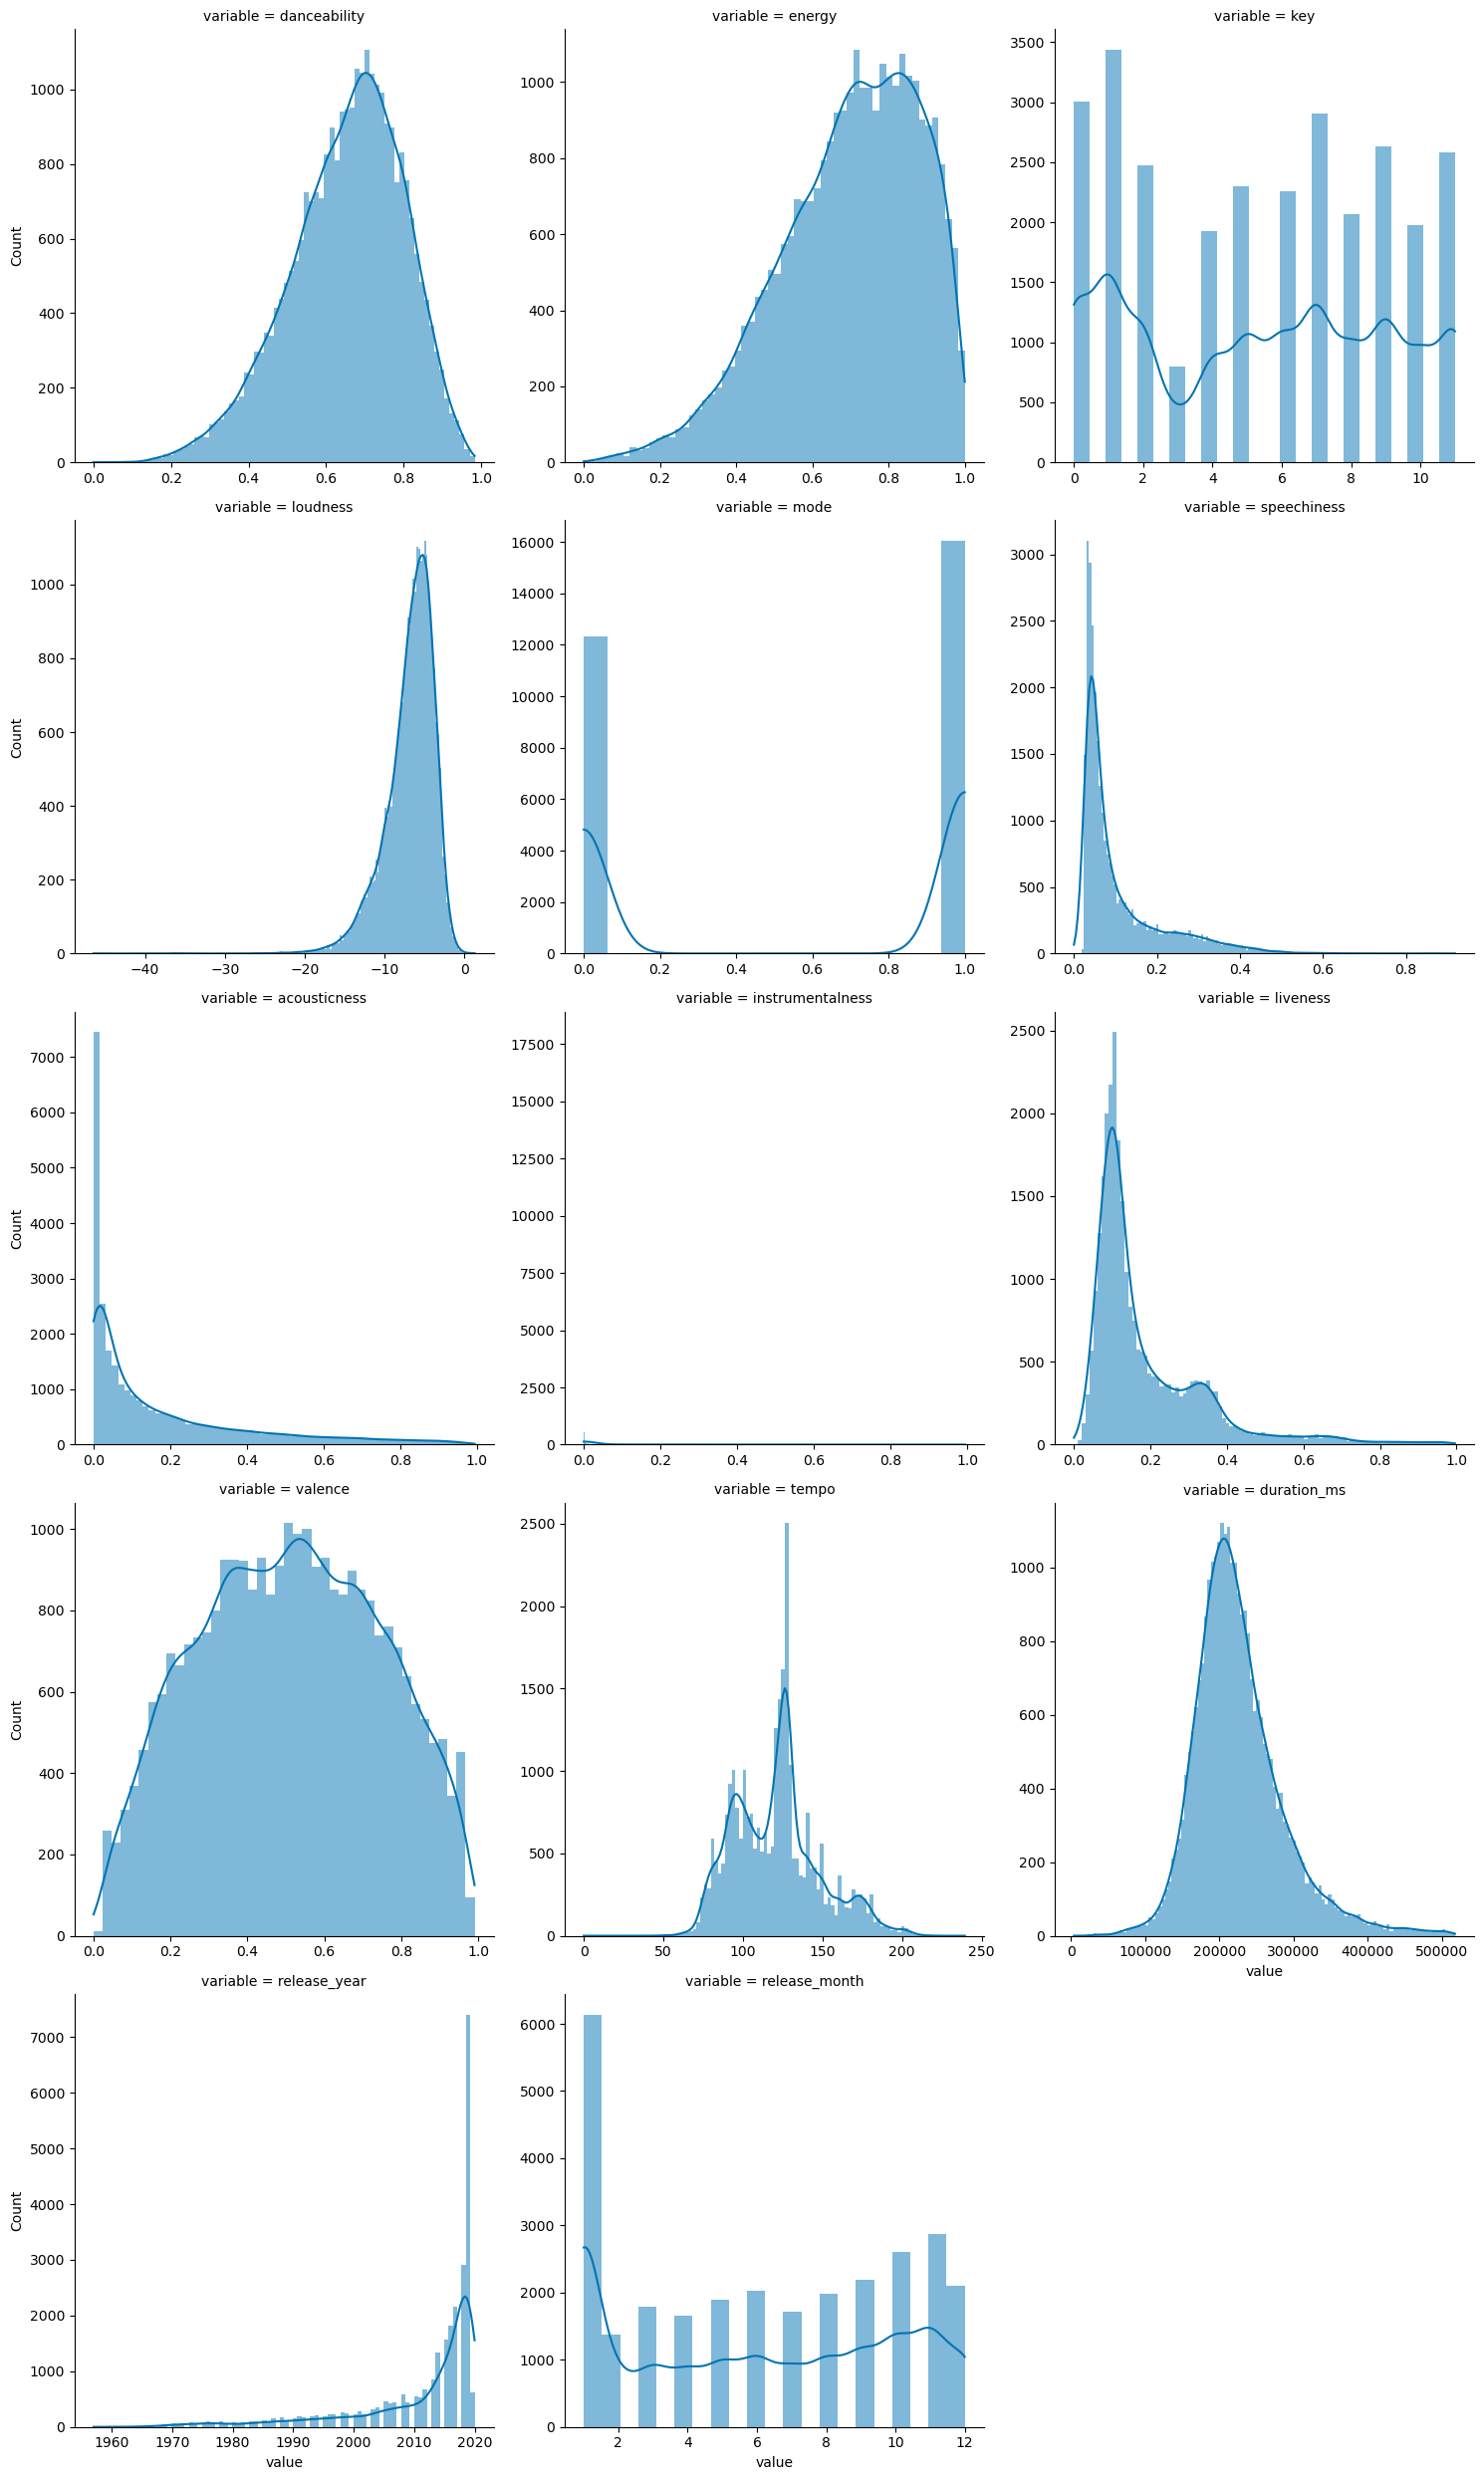

In [549]:
sns.displot(data = df_lf, x='value', col='variable', kind='hist', kde=True,
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False,
            col_wrap=3)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.tight_layout()
plt.show()

In [544]:
# # boxplot for numerical columns
# columns = ['release_year', 'release_month', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
# for i, col in enumerate(columns):
#     sns.boxplot(y=col, data=df_copy[[f'{col}']], ax=axes[i//4, i%4])
#     axes[i//4, i%4].set_title(col)
# plt.tight_layout()
# plt.show()

### 💡 Observation

* We can see that  speechiness, instrumentalness, liveness, acousticness are skewed right.

* loudness, mode, time_signature are skewed left.

* Only danceability, energy, valence, tempo have normal / approx normal distribution.

📌 Before we can use the data for modeling, we must transform the left and right skewed features have more symmetrical and bell-shaped distributions.

## Visualize Relatiopnships

### Categorical-to-categorical relationships

#### track_popularity_bin Vs playlist_genre

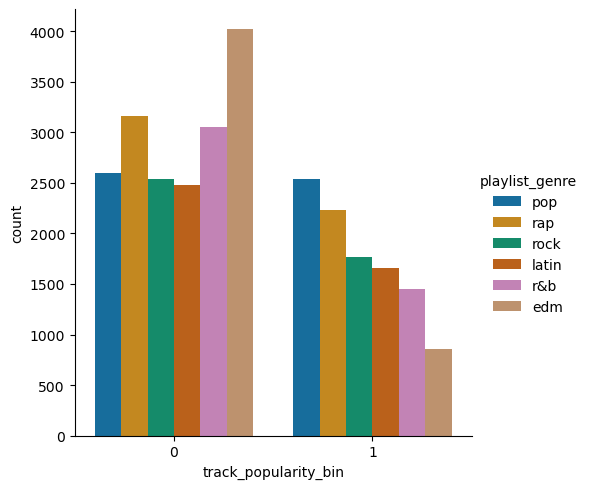

In [566]:
sns.catplot( data = df, x='track_popularity_bin', hue='playlist_genre', kind='count' )

plt.show()

💡 The above visualization between `track_popularity_bin` and `playlist_genre` using **DODGED BAR CHART** shows that the `edm` genre is the most unpopular genre. Other genres have approx same number of tracks across both unpopular and popular categories. We can also see that `pop` and `rap` are the most popular genres

#### playlist_subgenre Vs playlist_genre

Next, visualizing the relationship between `playlist_subgenre` and `playlist_genre` using **HEATMAP**

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap( pd.crosstab( df.playlist_subgenre, df.playlist_genre ), ax = ax,
             annot=True, annot_kws={'size': 10}, fmt='d',
             cbar=False)

plt.show()

📌 Above heatmap shows that the `playlist_subgenre` is highly correlated with `playlist_genre`. With this information, `playlist_subgenre` field can be **dropped** from the dataset as having highly correlated variables doesn't add a lot of value for the final model.

In [ ]:
df.drop(columns=['playlist_subgenre'], inplace=True)


### Categorial to Continuous

#### Key Vs Track Popularity

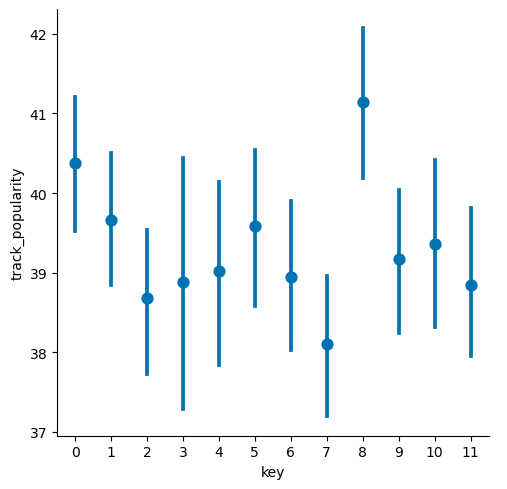

In [601]:
sns.catplot( data = df, x='key', y='track_popularity', kind='point', linestyle='none')

plt.show()

💡 Tracks with higher popularity tend to have higher value for `key`

#### Mode Vs Track Popularity

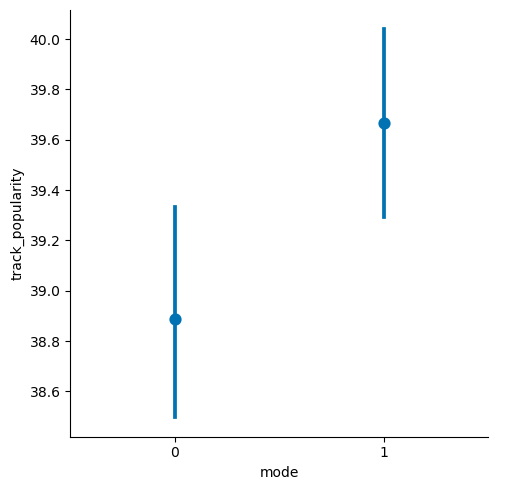

In [602]:
sns.catplot( data = df, x='mode', y='track_popularity', kind='point', linestyle='none')

plt.show()

💡 Tracks with higher popularity tend to have 1 as the `mode`

#### Release Year Vs Track Popularity

<Axes: xlabel='release_year_bin', ylabel='track_popularity'>

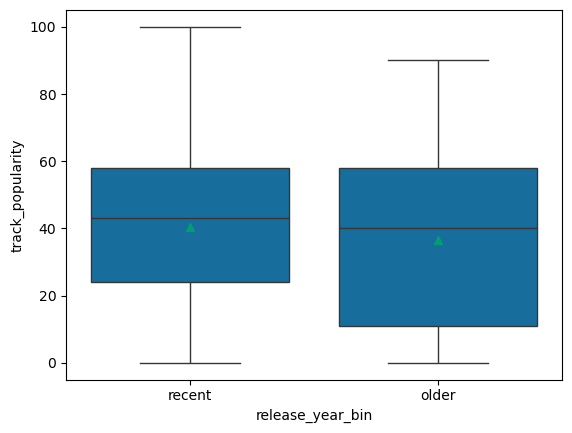

In [592]:
sns.boxplot(data=df, x="release_year_bin", y="track_popularity", showmeans=True)

The above observation tells us that songs released recently have higher popularity compared to the songs released in the older years. This gives us a good indication that `release_year_bin` can have impact on the `popularity`.

#### Release Month Vs Track Popularity

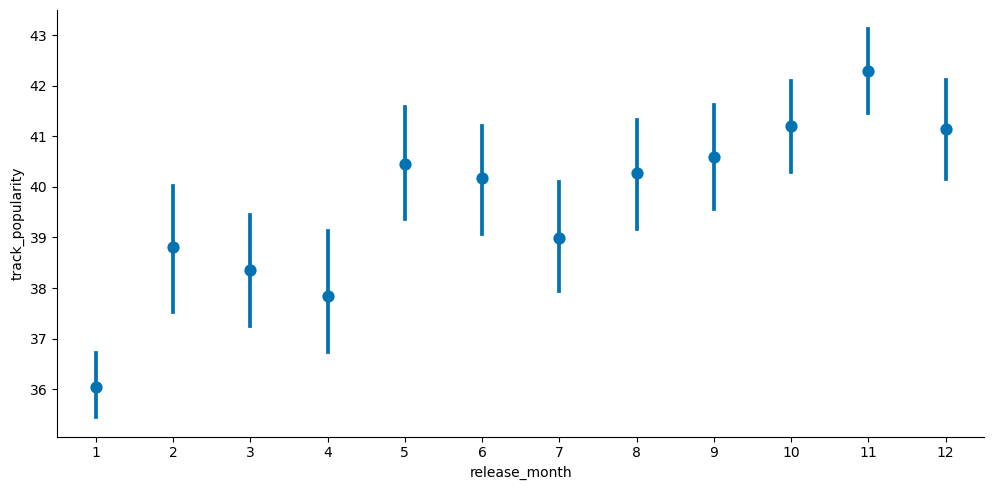

In [594]:
sns.catplot(data=df, x="release_month", y="track_popularity", kind='point', aspect=2, linestyle='none')

💡 Tracks that were released during the months of October, November and December tend to have higher popularity. 

### Continuous-to-Continuous Relationships

#### Corr plot for ALL variables

Correlation plot is one of the very effective way to view the relationships between continuous variables

Below is the corr plot for the given dataset

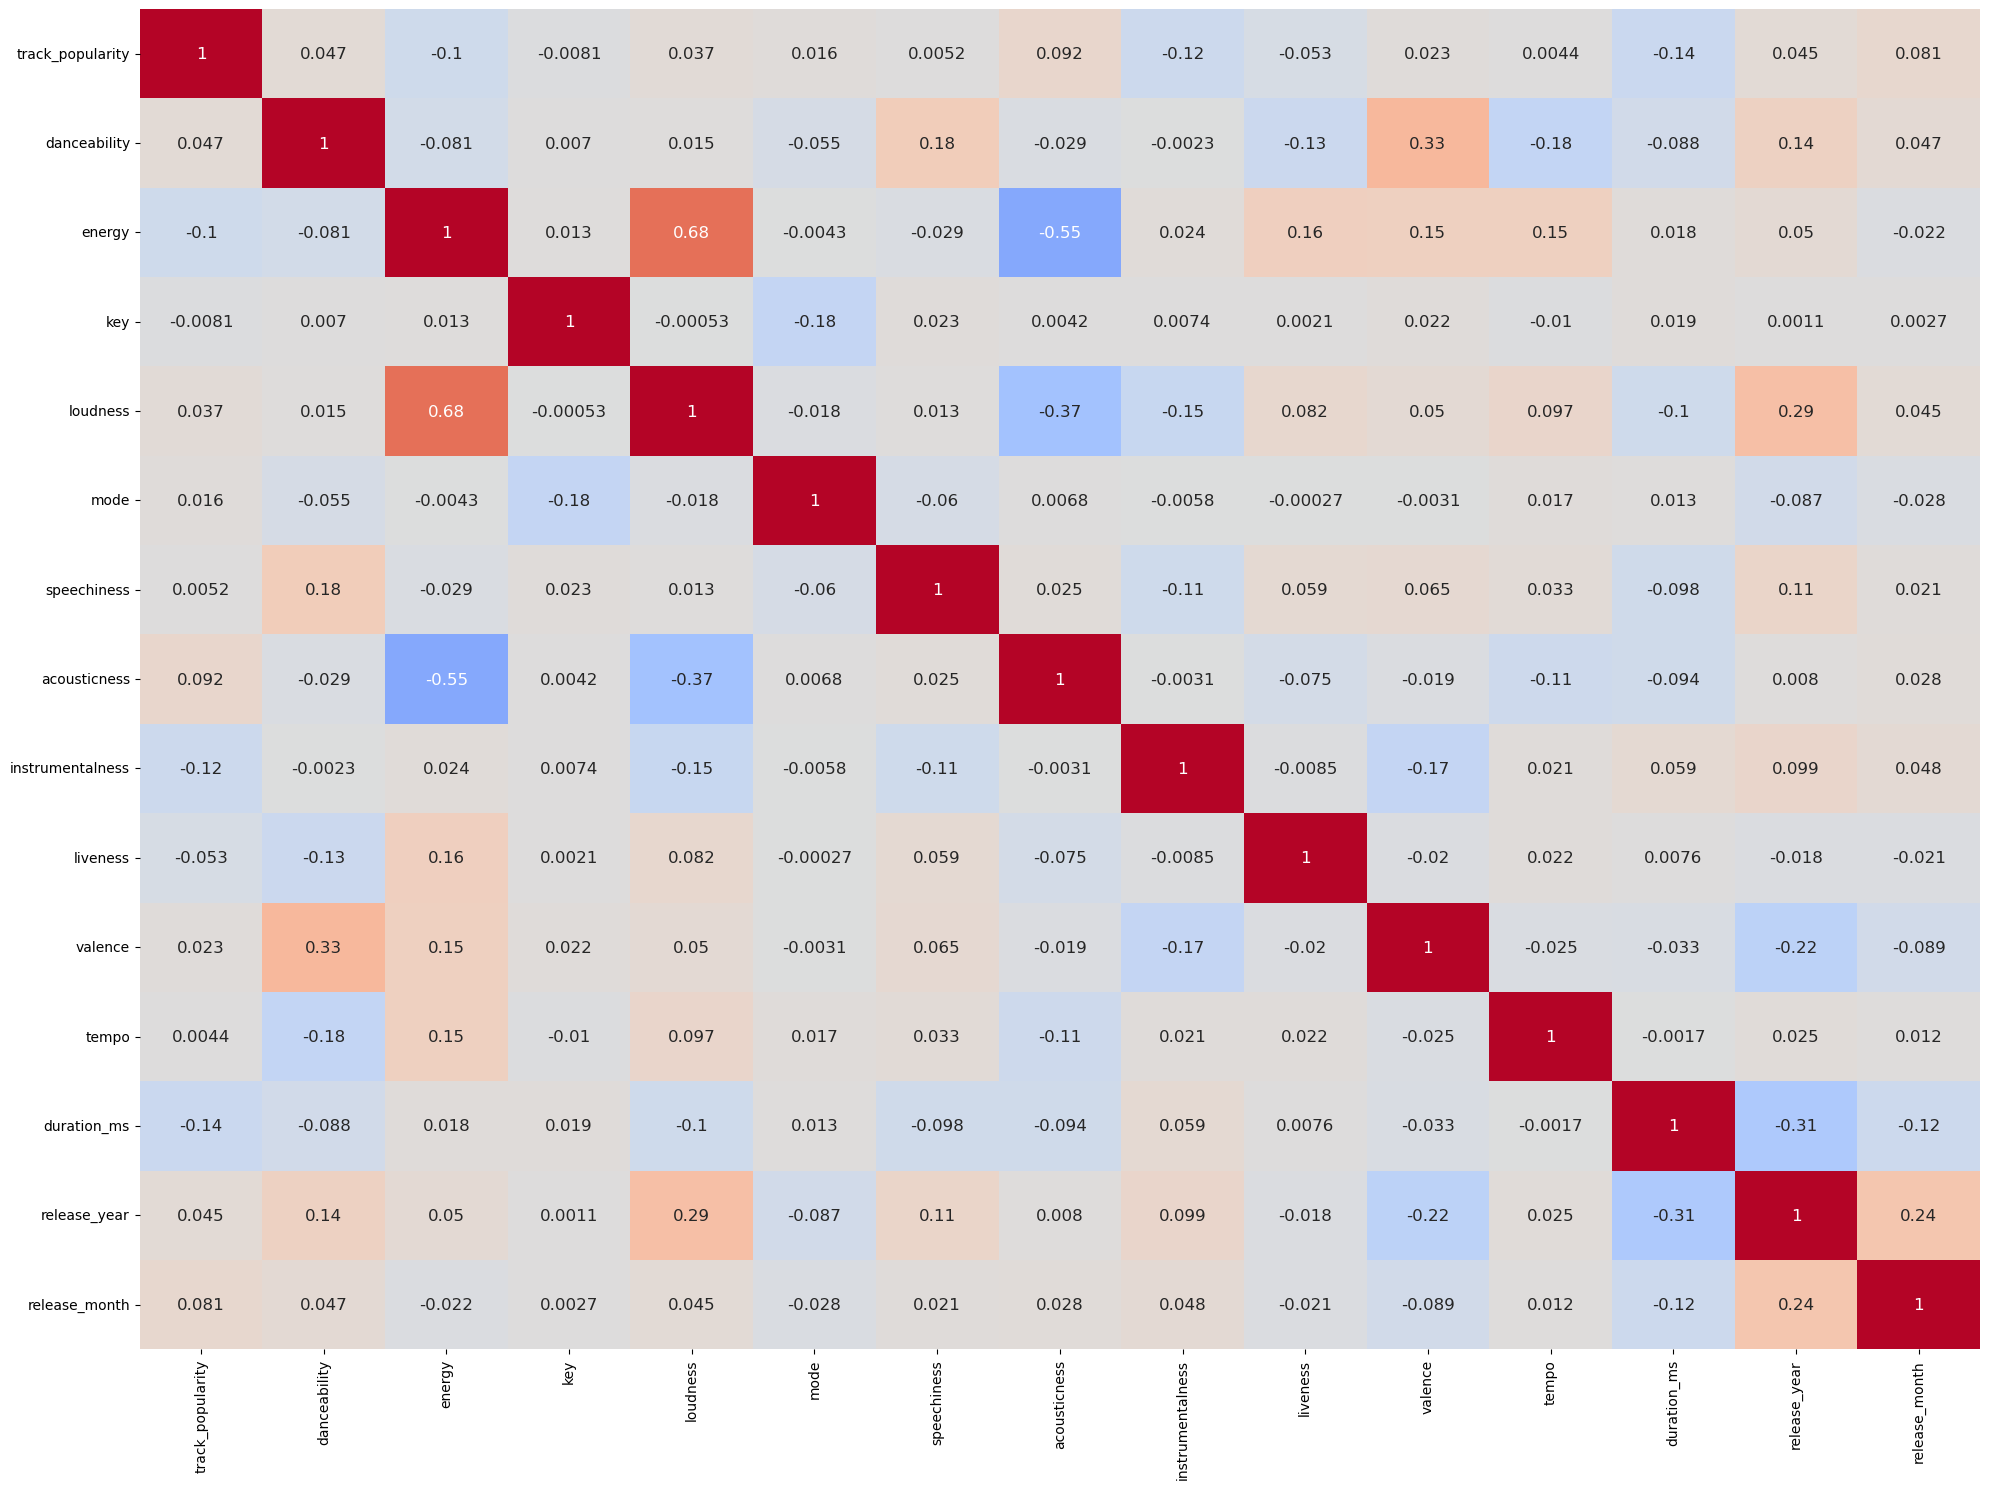

In [639]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(data = df.select_dtypes('number').corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size': 12},
            ax=ax)
plt.tight_layout()
plt.show()

💡 The above plot reveals the following
1. `energy` and `loudness` are highly positively correlated
2. `energy` and `acousticness` are highly negatively correlated
3. `track_popularity` has a low correlation with all other variables. This is good because we can use the other variables to "predict" track popularity

**Next, visualizing the relationships between few different continuous variables**

#### energy Vs danceability

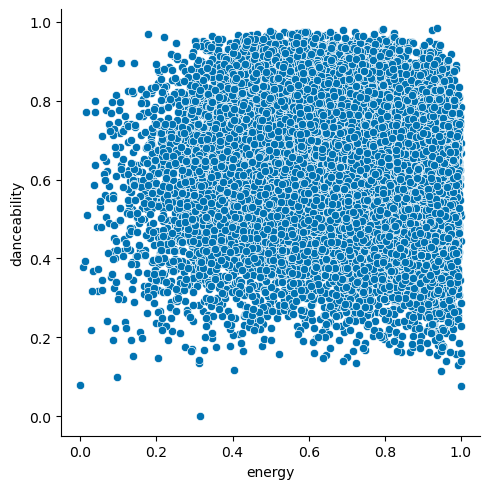

In [640]:
sns.relplot(data = df, x='energy', y='danceability')

plt.show()

💡Tracks with higher energy tend to be more danceable

#### acousticness Vs loudness

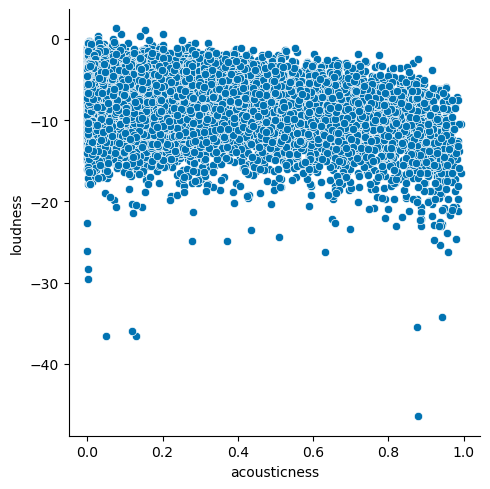

In [664]:
sns.relplot(data = df, x='acousticness', y='loudness')

plt.show()

💡 Tracks that are more acoustic tend to be less louder than the tracks that are less acoustic

#### valence Vs danceability

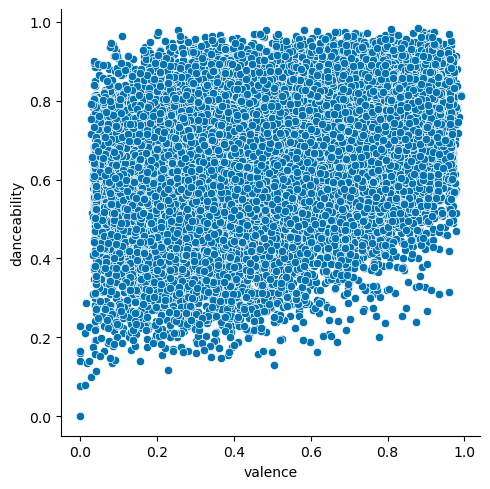

In [644]:
sns.relplot(data = df, x='valence', y='danceability')

plt.show()

💡 Danceability of tracks increase with increase in valence

### Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values

Will be visualizing the conditional distribution of continuous inputs group by the response variable `track_popularity_bin`

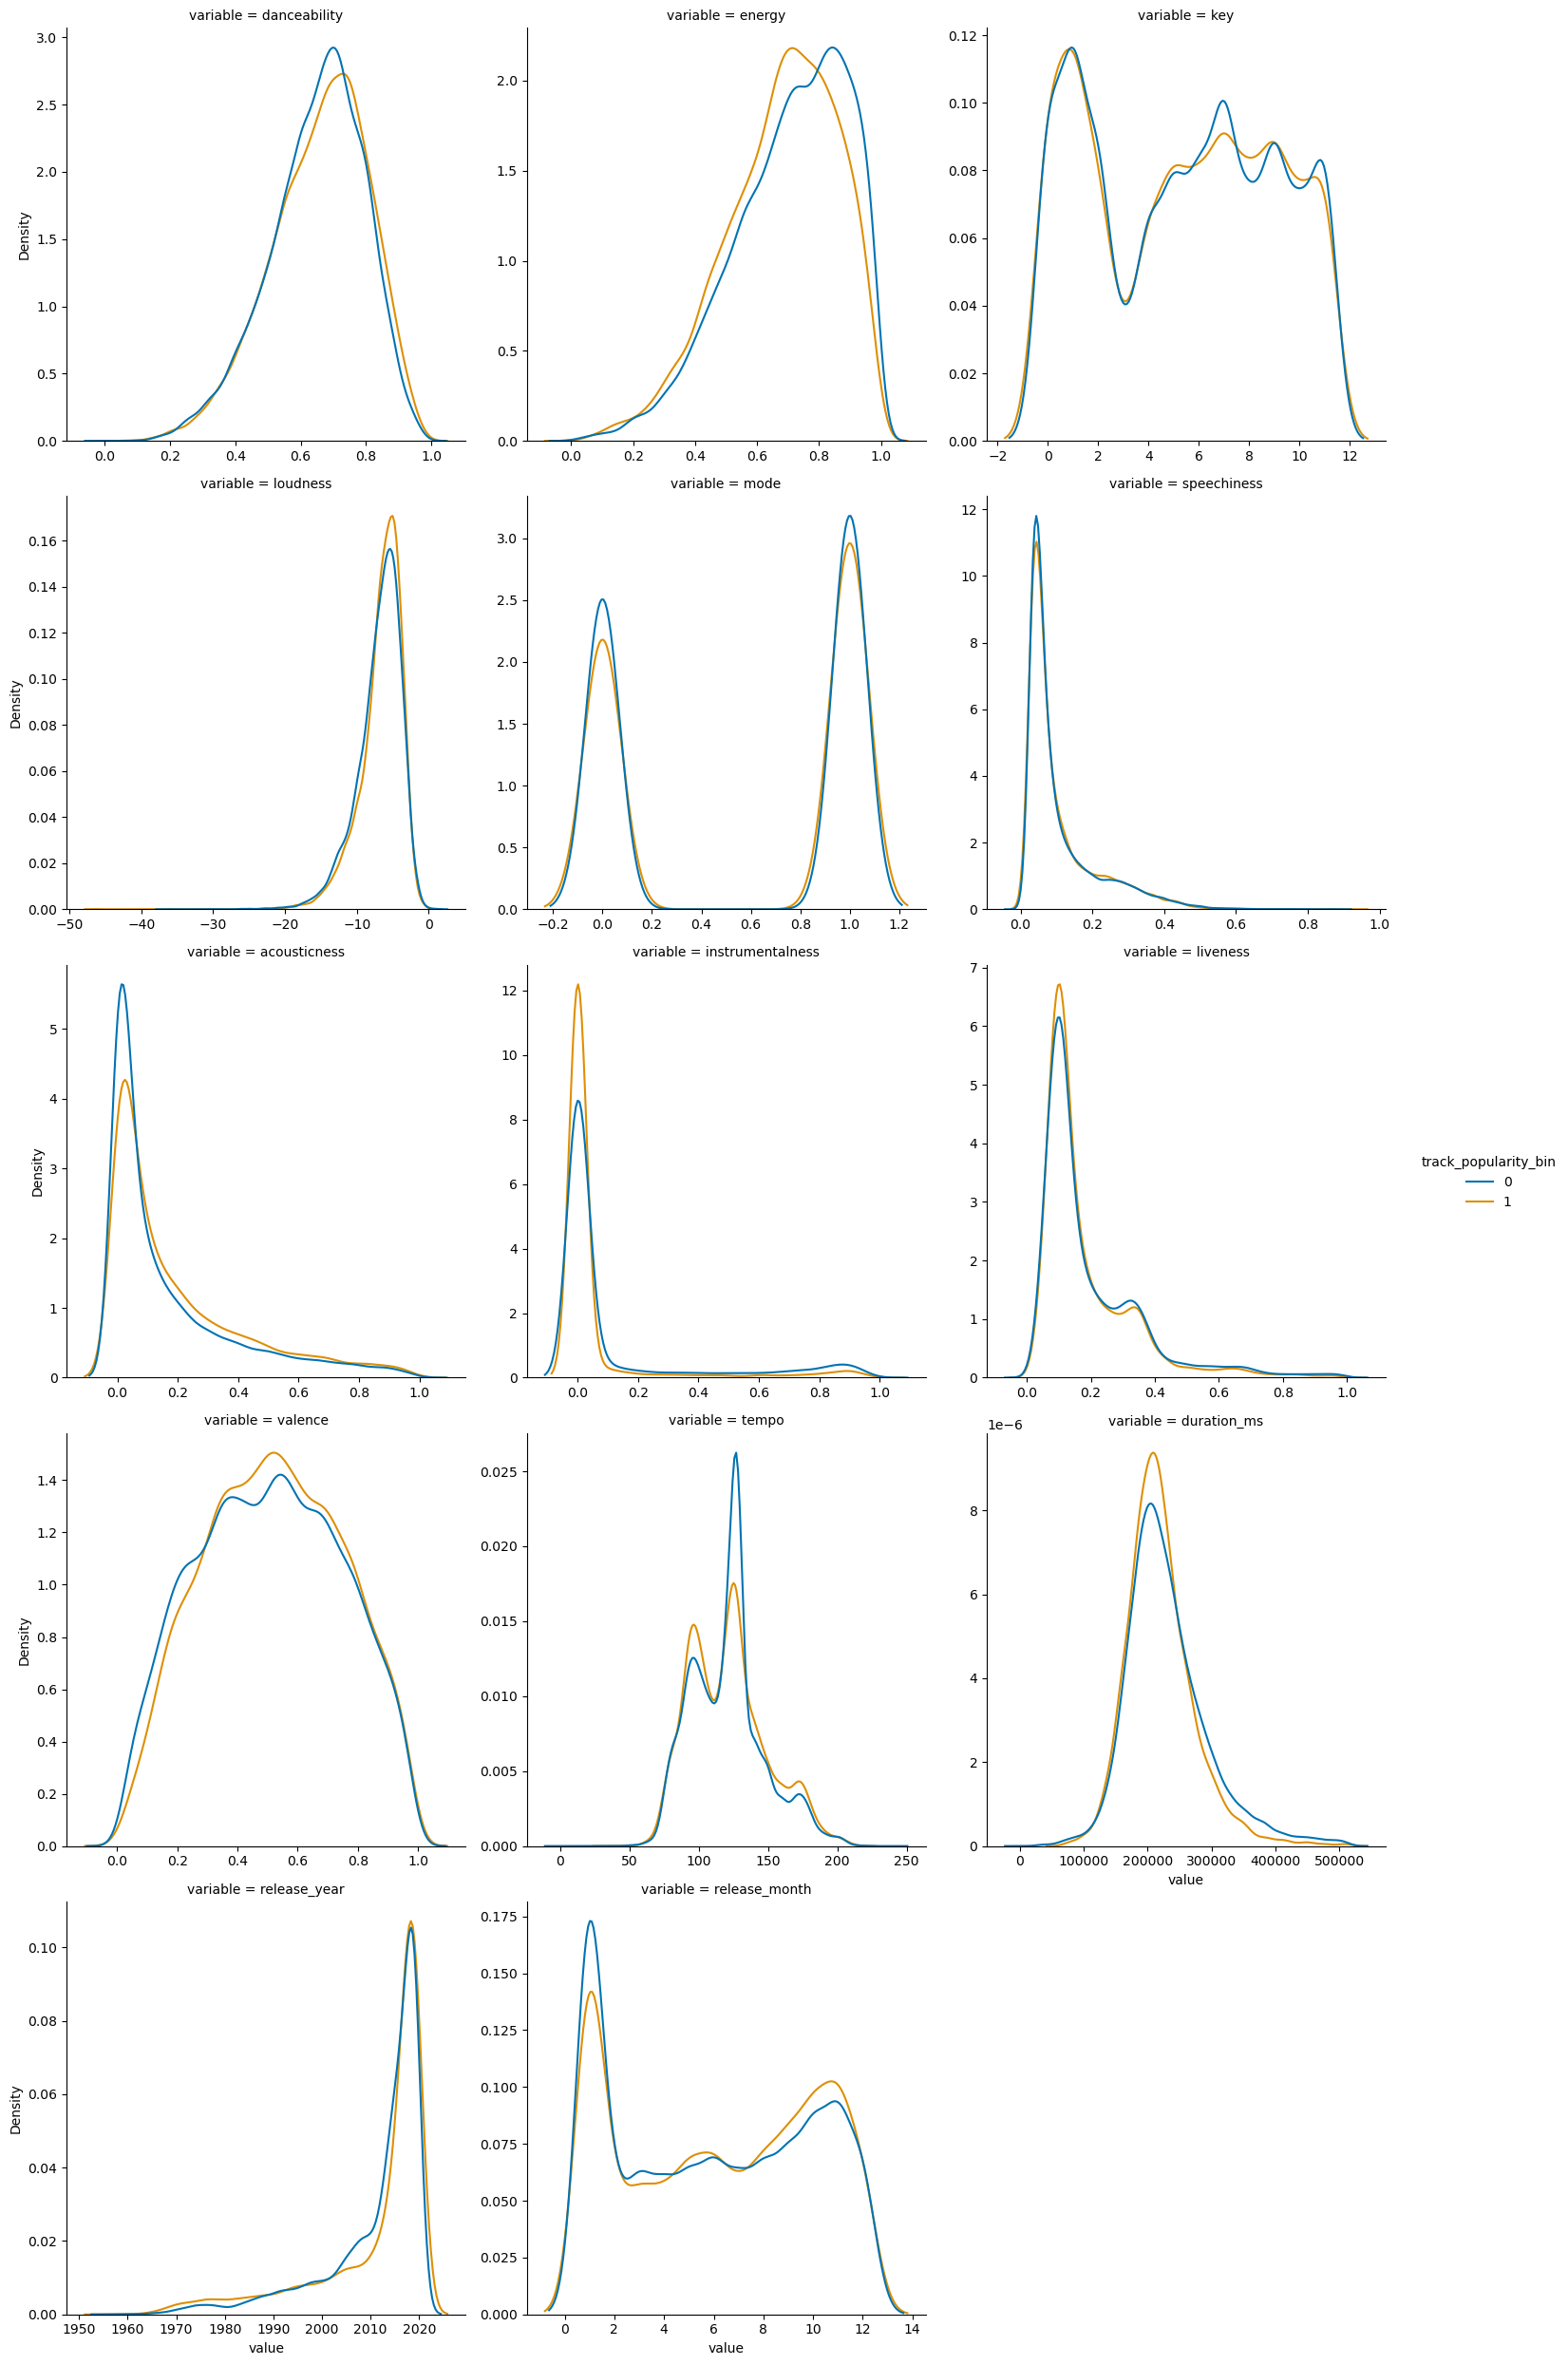

In [655]:
sns.displot(data = df_lf, x='value', col='variable', kind='kde',
            hue='track_popularity_bin',
            facet_kws={'sharex': False, 'sharey': False},
            common_norm=False,
            col_wrap=3
           )

plt.show()

💡 **Observations**
* `danceability` of popular songs (track_popularity_bin=1) is higher than the unpopular songs (track_popularity_bin=0)
* `acousticness` on popular songs is lower than the unpopular songs
* popular songs tend to have lesser duration compared to the unpopular songs

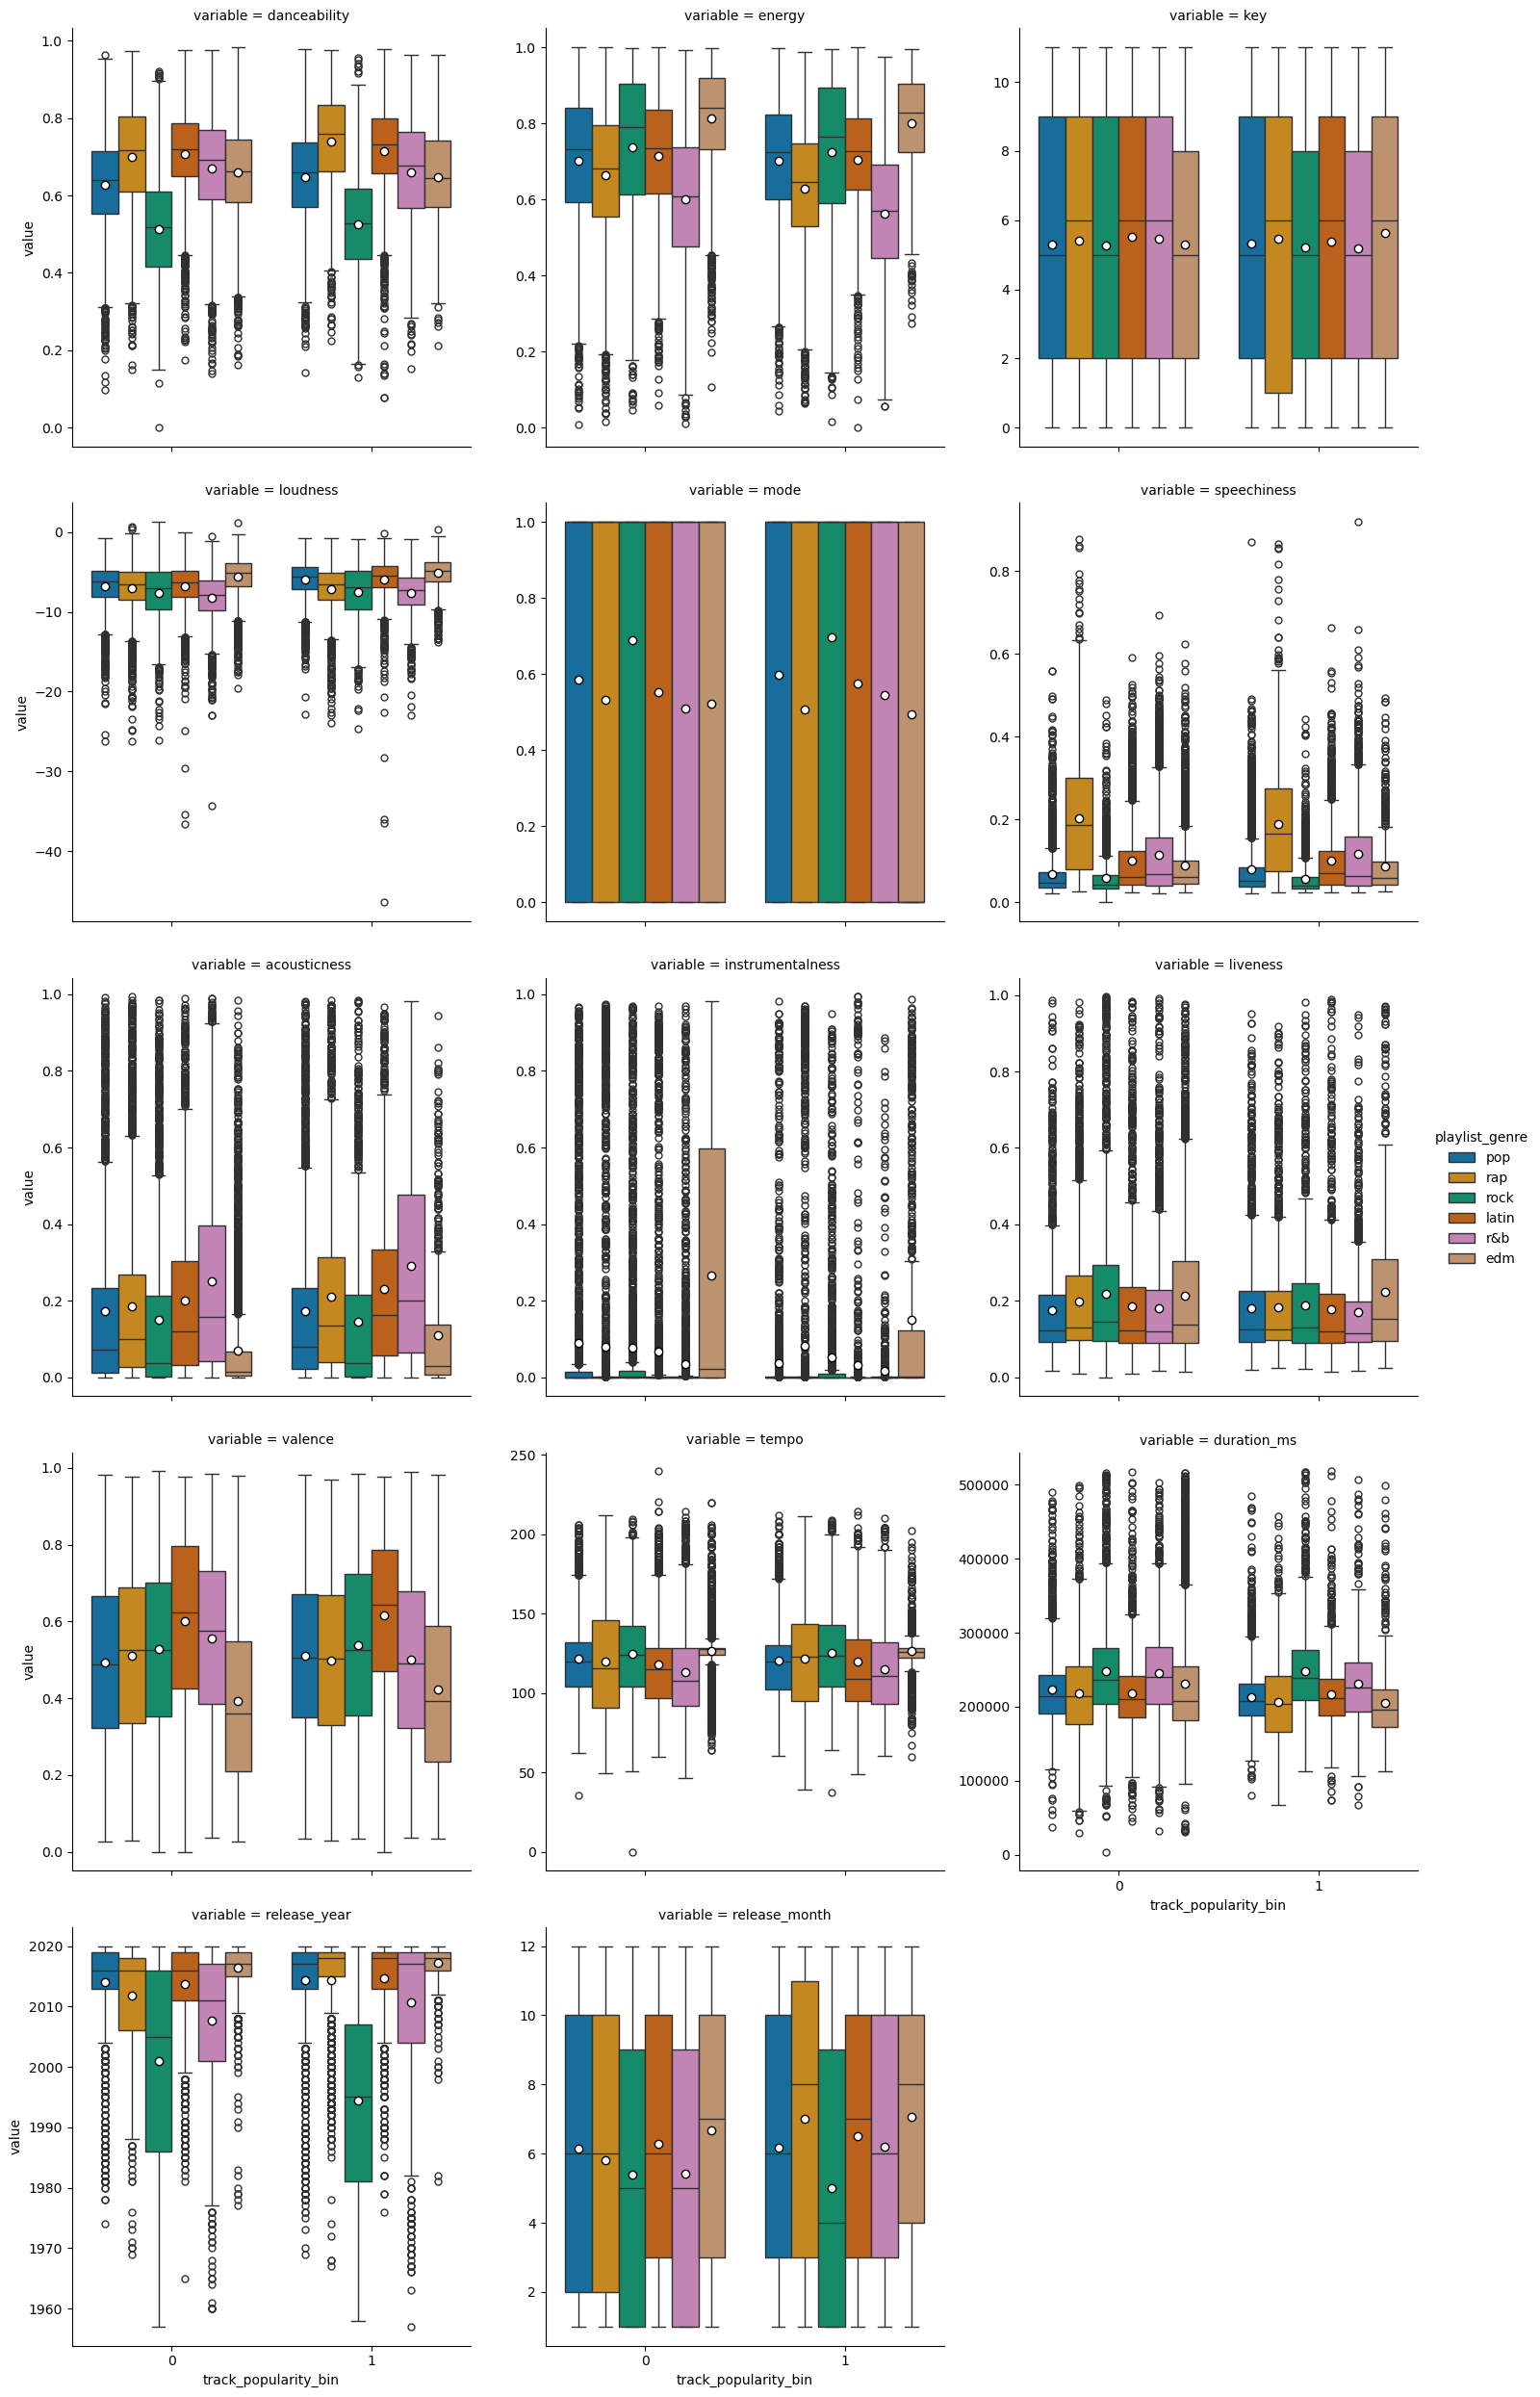

In [659]:
sns.catplot(data = df_lf, x='track_popularity_bin', y='value', col='variable',
            hue='playlist_genre',
            kind='box',
            sharey=False,
            showmeans=True,
            col_wrap=3,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})
plt.show()

💡 **Observations**
* The `danceability` score is higher for **pop** and **rap** tracks in the popular category compared to the unpopular category
* Tracks of the genre **rock** tend to be longer in duration than other genres
* `loudness` seems to be higher for all genres in the popular category compared to the unpopular category
* The distribution of the continuous variables vary for each genre. This allows to infer that the continuous variables by themselves is sufficient to determine the popularity of a track without relying on the genre

In [ ]:
import warnings
top_n = 10
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['track_artist'].value_counts().head(top_n)
top_albums = df['track_album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['playlist_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

### Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values

Here, leveraging SCATTER PLOT to visualize the relationships between continuous inputs GROUPED BY the response (outcome) unique values

#### tempo Vs valence GROUPED BY track_popularity_bin

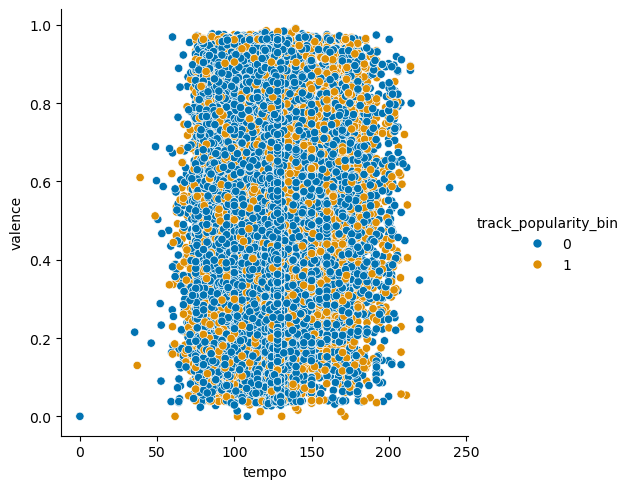

In [631]:
sns.relplot(data=df, x='tempo', y='valence', hue='track_popularity_bin')

plt.show()

💡 Popular tracks tend (track_popularity_bin=1) to have higher temp and valence compated to the unpopular tracks (track_popularity_bin=0)

#### tempo Vs danceability GROUPED BY track_popularity_bin

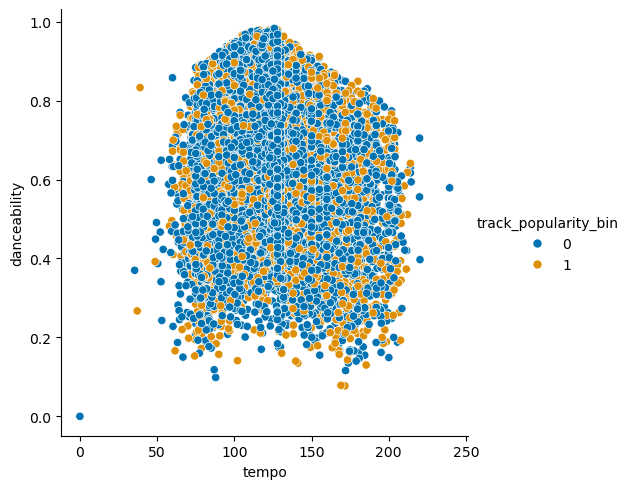

In [663]:
sns.relplot(data=df, x='tempo', y='danceability', hue='track_popularity_bin')

plt.show()

💡**Observations**
1. The `danceability` increases as `tempo` increases
2. Popular songs tend to have higher tempo(track_popularity_bin=1) and danceability compared to the unpopular tracks (track_popularity_bin=1)
3. Given the `tempo` and `danceability` score one can determine the popularity of a track

#### acousticness Vs loudness GROUPED BY track_popularity_bin

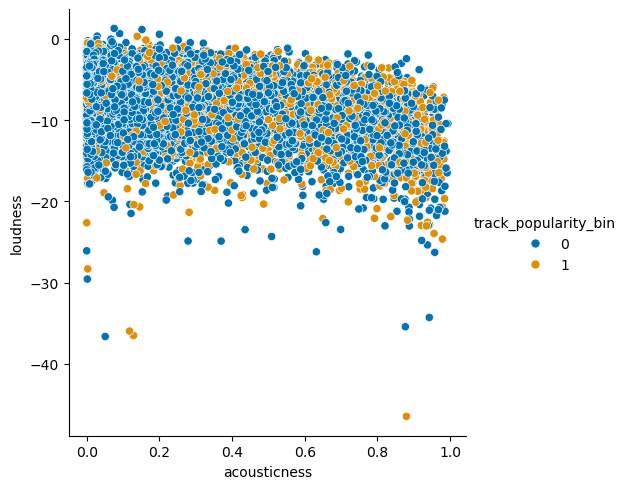

In [665]:
sns.relplot(data=df, x='acousticness', y='loudness', hue='track_popularity_bin')

plt.show()

💡Tracks that are more acoustic tend to be less louder

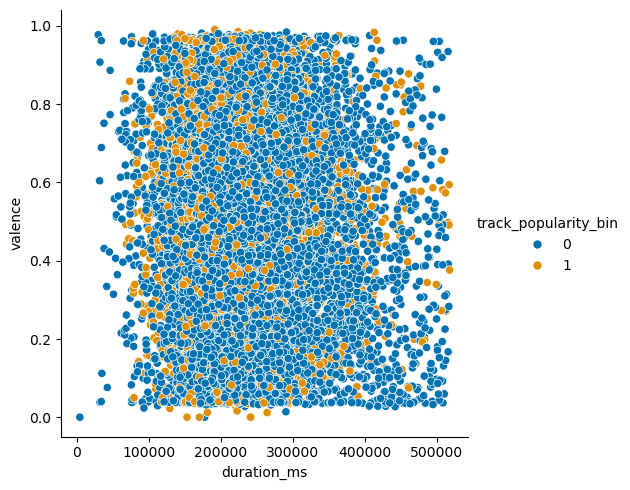

In [676]:
sns.relplot(data=df, x='duration_ms', y='valence', hue='track_popularity_bin')

plt.show()

💡 **Observations**
1. Popular tracks sound more positive (higher `valence` value) and these songs have a shorter duration
2. Unpopular tracks sound more negative (lower `valence` value) and these songs have a longer duration

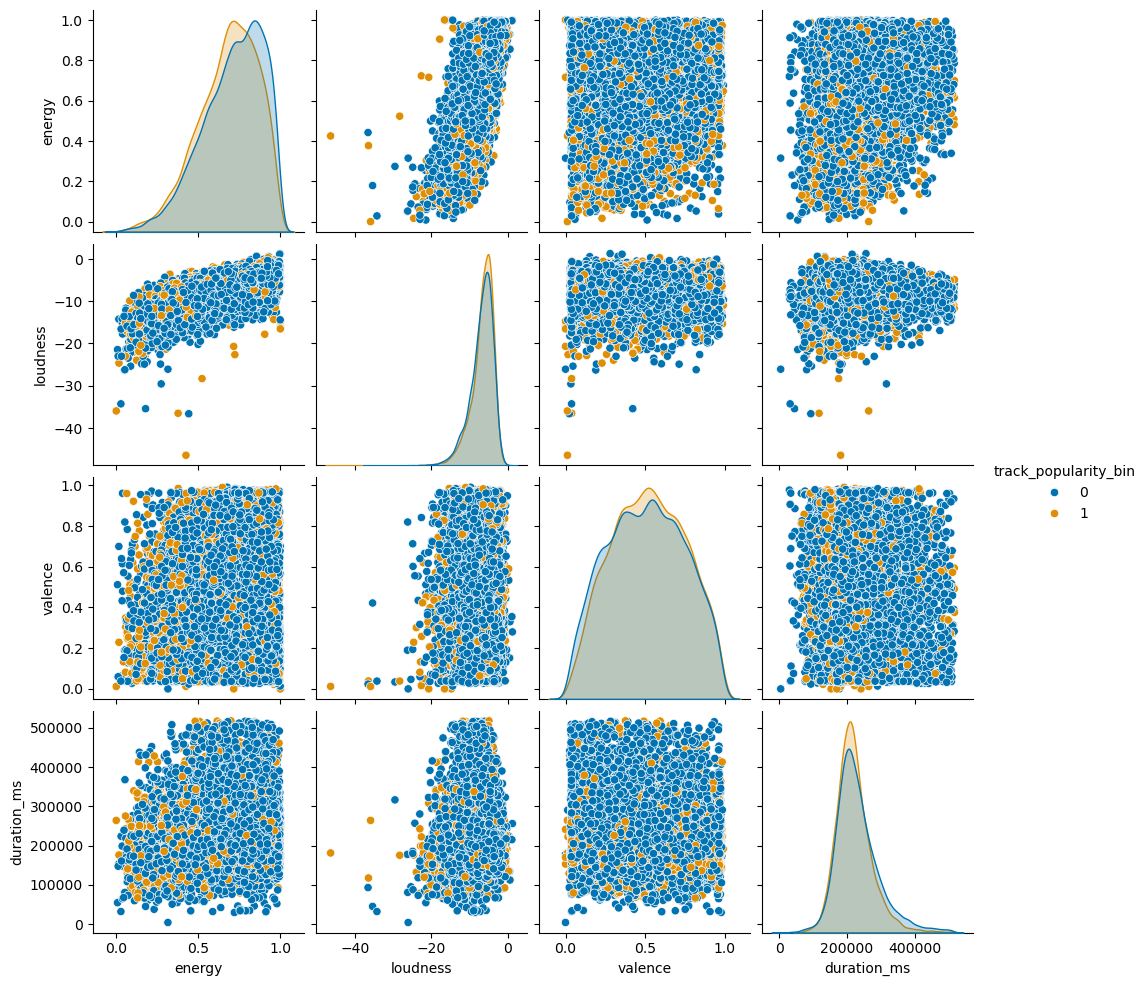

In [682]:
sns.pairplot(data=df[['energy', 'loudness', 'valence', 'duration_ms', 'track_popularity_bin']],
             hue='track_popularity_bin', 
             diag_kws={'common_norm': False})

plt.show()

💡 **Observations**

1. 

### Visualize the counts of combinations between the response (outcome) and categorical inputs

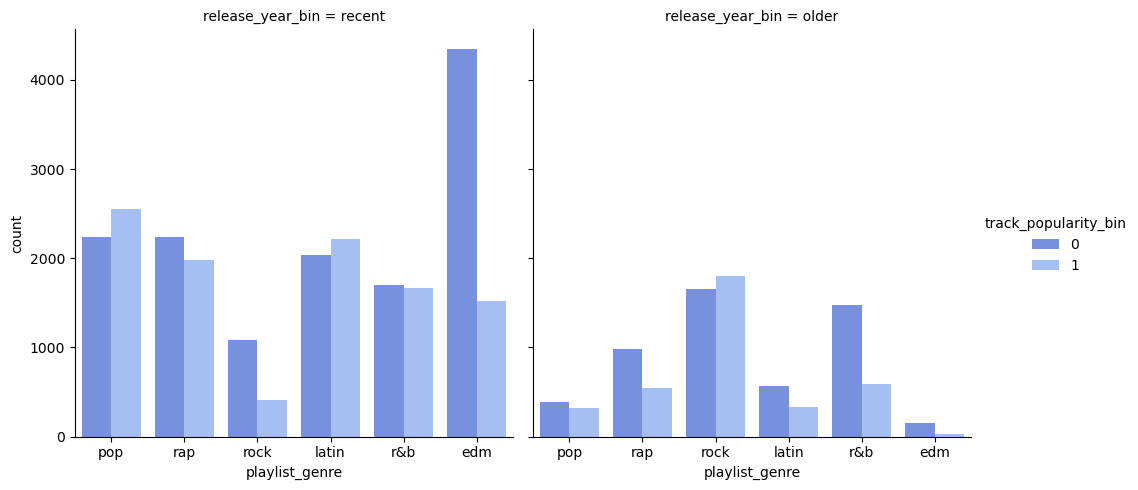

In [274]:
sns.catplot(data = df_copy, x='playlist_genre', hue='track_popularity_bin', col='release_year_bin', kind='count', )

plt.show()

`rock` used to be the most popular genre in the older years and it has been replaced by `pop` and `rap` in the recent years

In [ ]:
df.playlist_genre.value_counts(normalize=True)

## K-Means Clustering

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [370]:
columns_to_use = ['instrumentalness', 'danceability', 'valence', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness']
df_features = df_copy[columns_to_use]

In [371]:
Xtracks = StandardScaler().fit_transform(df_features)

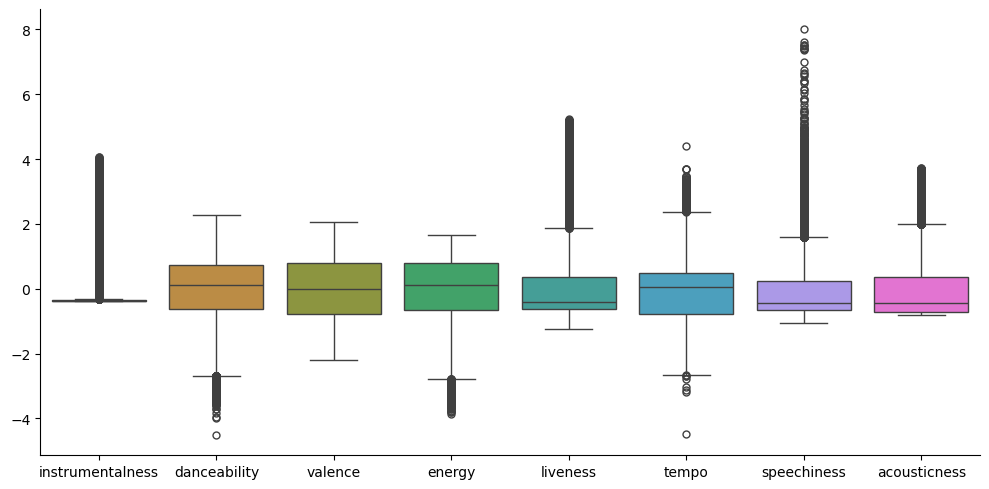

In [372]:
sns.catplot(data = pd.DataFrame(Xtracks, columns=df_features.columns), kind='box', aspect=2)

plt.show()

In [295]:
clusters_2 = KMeans(n_clusters=10, random_state=121, n_init=25, max_iter=500).fit_predict(Xtracks)

In [296]:
df_k = df_copy.copy()

In [297]:
df_k['k2'] = pd.Series( clusters_2, index=df_k.index ).astype('category')

In [298]:
df_k.k2.value_counts()

k2
9    6079
8    4322
4    4308
3    4074
2    3438
5    3107
1    3019
0    2127
7    1699
6     660
Name: count, dtype: int64

In [ ]:
sns.pairplot(data = df_k, hue='k2', diag_kws={'common_norm': False})

plt.show()

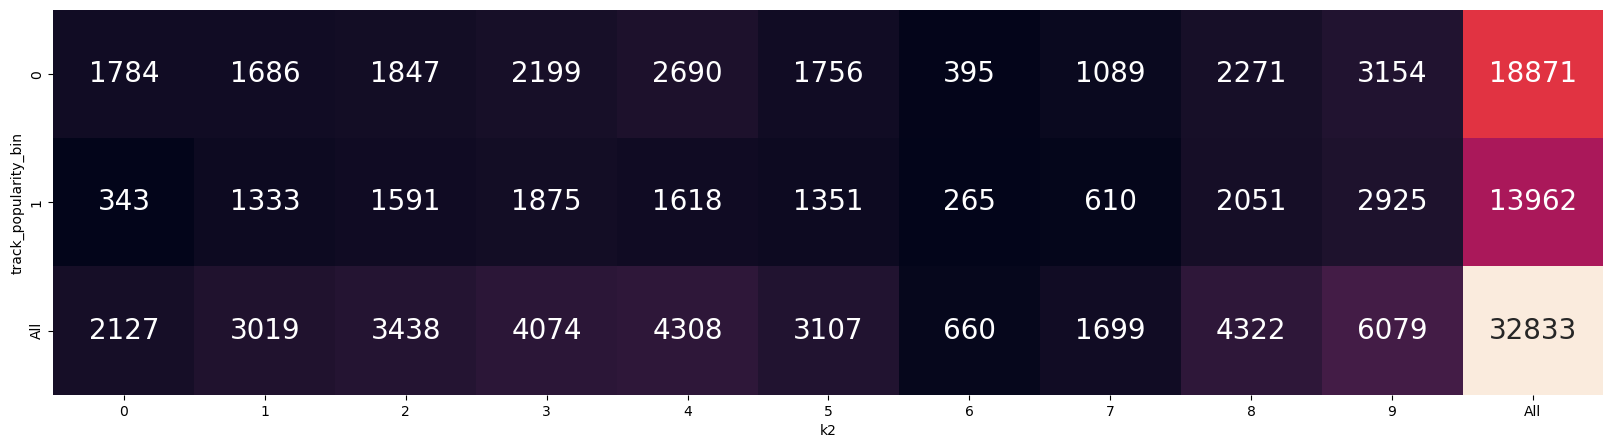

In [302]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.heatmap(data = pd.crosstab( df_k.track_popularity_bin, df_k.k2, margins=True ), 
            annot=True, annot_kws={"fontsize": 20}, fmt='g',
            cbar=False,
            ax=ax)

plt.show()

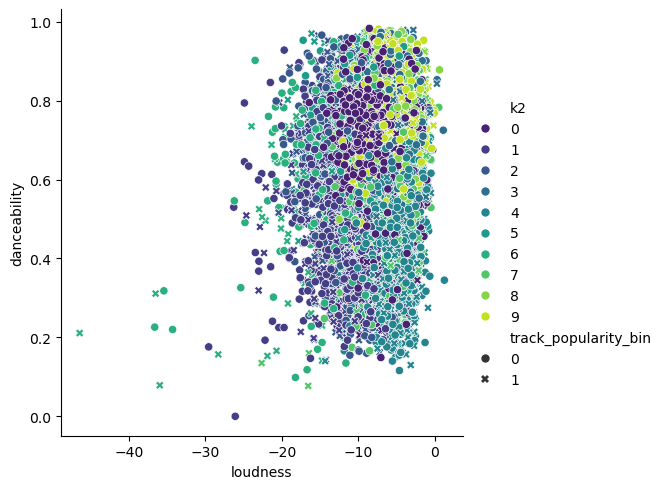

In [406]:
sns.relplot(data = df_k, x='loudness', y='danceability', hue='k2', style='track_popularity_bin', palette='viridis')

plt.show()

In [378]:
tots_within = []

K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(Xtracks)
    tots_within.append( km.inertia_ )

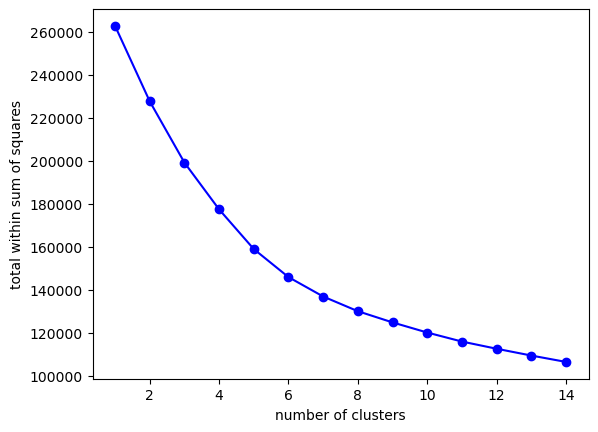

In [379]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

In [380]:
clusters_6 = KMeans(n_clusters=6, random_state=121, n_init=25, max_iter=500).fit_predict( Xtracks )

In [384]:
df_features['k6'] = pd.Series( clusters_6, index=df_features.index ).astype('category')

/tmp/ipykernel_4948/3005426207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['k6'] = pd.Series( clusters_6, index=df_features.index ).astype('category')


In [385]:
df_features.head()

instrumentalness  danceability  valence  energy  liveness    tempo  \
0          0.000000         0.748    0.518   0.916    0.0653  122.036   
1          0.004210         0.726    0.693   0.815    0.3570   99.972   
2          0.000023         0.675    0.613   0.931    0.1100  124.008   
3          0.000009         0.718    0.277   0.930    0.2040  121.956   
4          0.000000         0.650    0.725   0.833    0.0833  123.976   

   speechiness  acousticness k6  
0       0.0583        0.1020  3  
1       0.0373        0.0724  3  
2       0.0742        0.0794  3  
3       0.1020        0.0287  4  
4       0.0359        0.0803  3

In [ ]:
sns.pairplot(data = df_features, hue='k6', diag_kws={'common_norm': False})

plt.show()

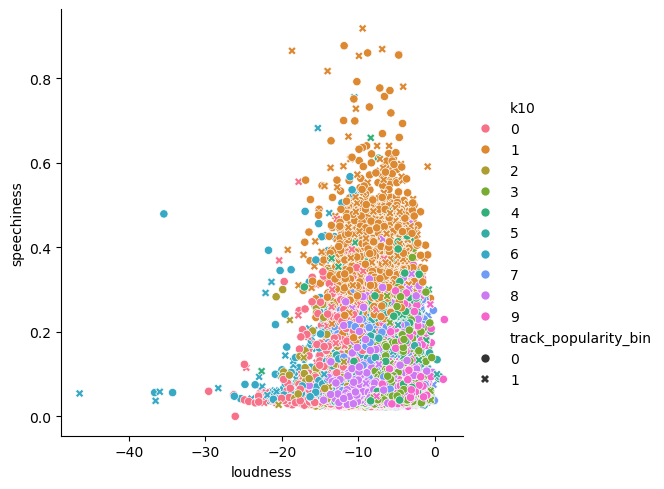

In [196]:
sns.relplot(data = df_copy, x='loudness', y='speechiness', hue='k10', style='track_popularity_bin')

plt.show()

In [ ]:
df_copy.isna().any()